# Capstone Project - The Battle of the Neighborhoods
# Japanese restaurant in Düsseldorf, Germany

### by Heinrich Tissen, 21.03.2020

### Applied Data Science Capstone by IBM/Coursera

## Table of contents

- Introduction
- Data
- Methodology
- Analysis
- Results and Discussion
- Conclusion

## 1. Introduction

Düsseldorf is the seventh largest city in Germany with a growing population. It has a huge variety of restaurants for every taste and, thus, to start a restaurant business in this area is not an easy task.

Our stakeholder is willing to open a japanese restaurant in the city of Düsseldorf. Since in Düsseldorf lives the largest japanese community in Continental-Europe a flourish japanese culture has been established. The idea is to jump on the bandwagon and open another restaurant offering excellent japanese cuisine.

Choosing a location for business is a stressful task, since there are a lot of criteria that have to be satisfied in order to achieve the highest revenue. Here are some of them:
- the density of other restaurants
- the density of specifically japanese restaurants
- population density around the location
- solvency of the population around the location

etc.

The target audience for this data analysis are all entrepreneurs who want to open a new Japanese restaurants or new restaurants in general. But this analysis can be interesting for different other investors and market analysts.

In this project, we will implement the basic analysis and try to find the most optimal borough to open a japanese restaurant according to those criteria. It's obvious, that there are many additional factors, such as distance from parking places or distance from the main streets, but this analysis can be done after choosing the borough, and thus will not be done within the scope of this project.

## 2. Data

### 2.1 Data description

Based on criteria listed above the following data will be utilized in our analysis:

- the number of restaurants within the certain radius of each borough (Foresquare API)
- the net income per person in each borough. It is important to consider the solvency of population. Source: Statistical report of Düsseldorf from 2015 (https://www.duesseldorf.de/fileadmin/Amt12/statistik/stadtforschung/download/statistisches_jahrbuch_2015.pdf)
- the population and the population density of the borough. Source: Statistical report of Düsseldorf from 2015 (https://www.duesseldorf.de/fileadmin/Amt12/statistik/stadtforschung/download/statistisches_jahrbuch_2015.pdf)
- the coordinates of the borough. Source: Open street map (https://www.openstreetmap.org/#map=12/51.2403/6.8184)

### 2.2 Data Preparation

Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

Load the list of boroughs of Düsseldorf with information about population based on the statistical report from 2015 into a dataframe. Coordinates are taken from Openstreetmap.

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_7581186010a74e46befa007e28e095a3.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-iil3e6bazy2nq2',Key='Duesseldorf_district.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head()

,Borough,Postcode,Neighbourhood,Latitude,Longitude,Population,Population Density
0,District 1,40219,Altstadt,51.22591,6.77357,78822,6975
1,District 2,40233,Flingern Süd,51.22101,6.81006,58712,8121
2,District 3,40215,Friedrichstadt,51.21212,6.78915,113914,4593
3,District 4,40545,Oberkassel,51.22958,6.75545,40666,3210
4,District 5,40474,Stockum,51.26922,6.74076,32841,644


In [3]:
print(df.shape)

(10, 7)


Use geopy library to get the latitude and longitude of Düsseldorf.

In [4]:
address = 'Düsseldorf'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Düsseldorf are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Düsseldorf are 51.2254018, 6.7763137.


Define Foursquare Credentials and Version

In [5]:
CLIENT_ID = 'FQME4PSB4FLMRXE0R1L5SO3E23WJGQJXA0CBP4JTNZ3EAWCY' # your Foursquare ID
CLIENT_SECRET = 'FKAZTL1J44UBA1XAMOOCLAZRDSJG31UKL1324SDQGHSNFR2F' # your Foursquare Secret
VERSION = '20200320' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FQME4PSB4FLMRXE0R1L5SO3E23WJGQJXA0CBP4JTNZ3EAWCY
CLIENT_SECRET:FKAZTL1J44UBA1XAMOOCLAZRDSJG31UKL1324SDQGHSNFR2F


Create a function to explore the venues for all boroughs in Düsseldorf

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
LIMIT = 100
radius = 1000
duesseldorf_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                   radius = radius
                                  )

District 1
District 2
District 3
District 4
District 5
District 6
District 7
District 8
District 9
District 10


In [8]:
print(duesseldorf_venues.shape)
duesseldorf_venues.head()

(485, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,District 1,51.22591,6.77357,Casita Mexicana,51.226676,6.775478,Mexican Restaurant
1,District 1,51.22591,6.77357,Rösterei VIER,51.225940,6.772294,Coffee Shop
2,District 1,51.22591,6.77357,Elephant Bar,51.226851,6.772636,Cocktail Bar
3,District 1,51.22591,6.77357,Rösterei VIER,51.224536,6.773703,Coffee Shop
4,District 1,51.22591,6.77357,Marktplatz,51.225802,6.772154,Plaza


Group the number of total venues by borough.

In [9]:
duesseldorf_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
District 1,100,100,100,100,100,100
District 10,5,5,5,5,5,5
District 2,88,88,88,88,88,88
District 3,100,100,100,100,100,100
District 4,53,53,53,53,53,53
District 5,16,16,16,16,16,16
District 6,21,21,21,21,21,21
District 7,10,10,10,10,10,10
District 8,70,70,70,70,70,70


Filter venues by restaurants.

In [10]:
duesseldorf_restaurant = duesseldorf_venues[(duesseldorf_venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby(['Borough']).count()
duesseldorf_restaurant.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
duesseldorf_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
duesseldorf_restaurant.head()

,Number of restaurants
Borough,
District 1,17
District 2,27
District 3,31
District 4,13
District 5,2


Filter venues by Japanese restaurants.

In [11]:
duesseldorf_jap = duesseldorf_venues[(duesseldorf_venues['Venue Category'].str.contains('Japanese Restaurant', regex=False)) | 
                                    (duesseldorf_venues['Venue Category'].str.contains('Ramen', regex=False)) |
                                    (duesseldorf_venues['Venue Category'].str.contains('Sushi', regex=False)) ].groupby(['Borough']).count()
duesseldorf_jap.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
duesseldorf_jap.rename(columns = {'Venue Category':'Number of Japanese restaurants'}, inplace=True)
duesseldorf_jap.head()

,Number of Japanese restaurants
Borough,
District 1,1
District 3,1


Merge all dataframes.

In [12]:
df = df.join(duesseldorf_restaurant, on='Borough')
df = df.join(duesseldorf_jap, on='Borough')

In [13]:
df.head()

,Borough,Postcode,Neighbourhood,Latitude,Longitude,Population,Population Density,Number of restaurants,Number of Japanese restaurants
0,District 1,40219,Altstadt,51.22591,6.77357,78822,6975,17.0,1.0
1,District 2,40233,Flingern Süd,51.22101,6.81006,58712,8121,27.0,NaN
2,District 3,40215,Friedrichstadt,51.21212,6.78915,113914,4593,31.0,1.0
3,District 4,40545,Oberkassel,51.22958,6.75545,40666,3210,13.0,NaN
4,District 5,40474,Stockum,51.26922,6.74076,32841,644,2.0,NaN


In [14]:
df.describe()

,Postcode,Latitude,Longitude,Population,Population Density,Number of restaurants,Number of Japanese restaurants
count,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.0
mean,40419.800000,51.221641,6.804016,60321.000000,3805.500000,12.777778,1.0
std,174.983047,0.038327,0.047153,27458.853844,2320.064523,11.497584,0.0
min,40215.000000,51.143590,6.740760,24351.000000,644.000000,1.000000,1.0
25%,40231.500000,51.213465,6.777465,41730.000000,2536.750000,2.000000,1.0
50%,40473.000000,51.220640,6.800895,58450.000000,3145.000000,13.000000,1.0
75%,40578.000000,51.228662,6.809485,74269.250000,4591.250000,19.000000,1.0
max,40625.000000,51.283870,6.897680,113914.000000,8121.000000,31.000000,1.0


In [15]:
# create map of Düsseldorf using latitude and longitude values
map_duesseldorf = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_duesseldorf)  
    
map_duesseldorf

For visualization of certain data barcharts are utilised starting with population by district.

In [16]:
import matplotlib.pyplot as plt
#plot data
df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population in Düsseldorf (2015)') # add title to the plot
plt.yticks (np.arange(11), df['Borough'])
plt.show()

<Figure size 1500x900 with 1 Axes>

Visualizing the population density by district.

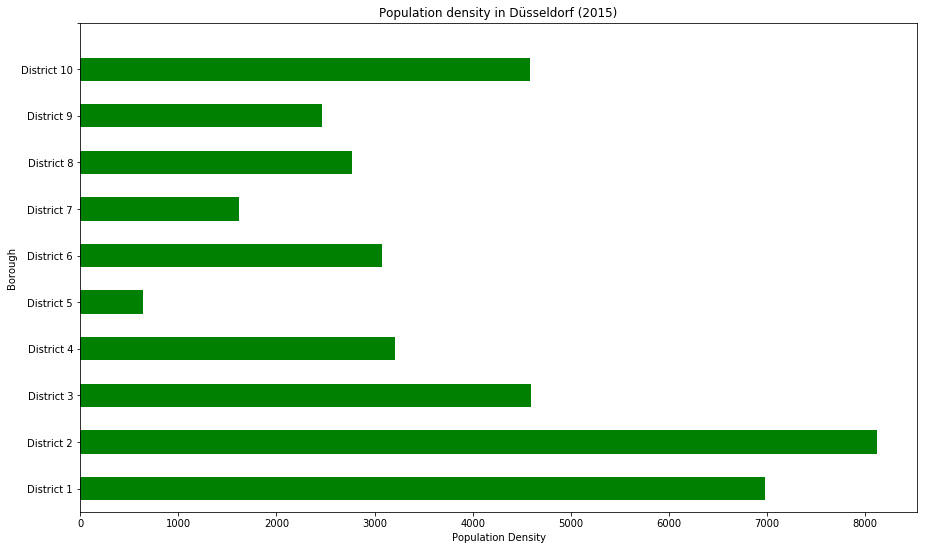

In [17]:
df[['Borough', 'Population Density']].plot(kind='barh', figsize=(15, 9), legend = None, color='green')

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population density in Düsseldorf (2015)') # add title to the plot
plt.yticks (np.arange(11), df['Borough'])
plt.show()

Barchart of the number of restaurants and Japanese restaurants in particular.

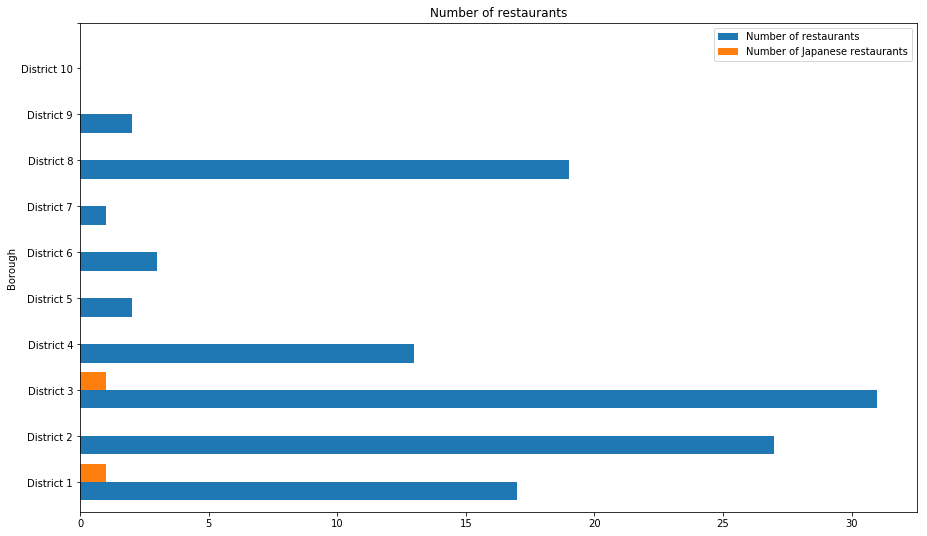

In [18]:
df[['Number of restaurants', 'Number of Japanese restaurants']].plot(kind='barh', figsize=(15, 9), width = 0.8)

#plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Number of restaurants') # add title to the plot
plt.yticks (np.arange(11), df['Borough'])
plt.show()

Calculating and visualizing the (Japanese) restaurant density per 1000 people per district.

In [19]:
df_restperpop = df.drop(['Postcode','Neighbourhood','Latitude','Longitude','Population Density'],axis=1)
df_restperpop['Number of restaurants per 1000 people']=df_restperpop['Number of restaurants']/(df_restperpop['Population']/1000)
df_restperpop['Number of Japanese restaurants per 1000 people']=df_restperpop['Number of Japanese restaurants']/(df_restperpop['Population']/1000)
df_restperpop = df_restperpop.drop(['Population','Number of restaurants','Number of Japanese restaurants'], axis=1)
df_restperpop.head(11)

,Borough,Number of restaurants per 1000 people,Number of Japanese restaurants per 1000 people
0,District 1,0.215676,0.012687
1,District 2,0.459872,NaN
2,District 3,0.272135,0.008779
3,District 4,0.319677,NaN
4,District 5,0.060899,NaN
5,District 6,0.049496,NaN
6,District 7,0.022261,NaN
7,District 8,0.326528,NaN
8,District 9,0.022177,NaN
9,District 10,NaN,NaN


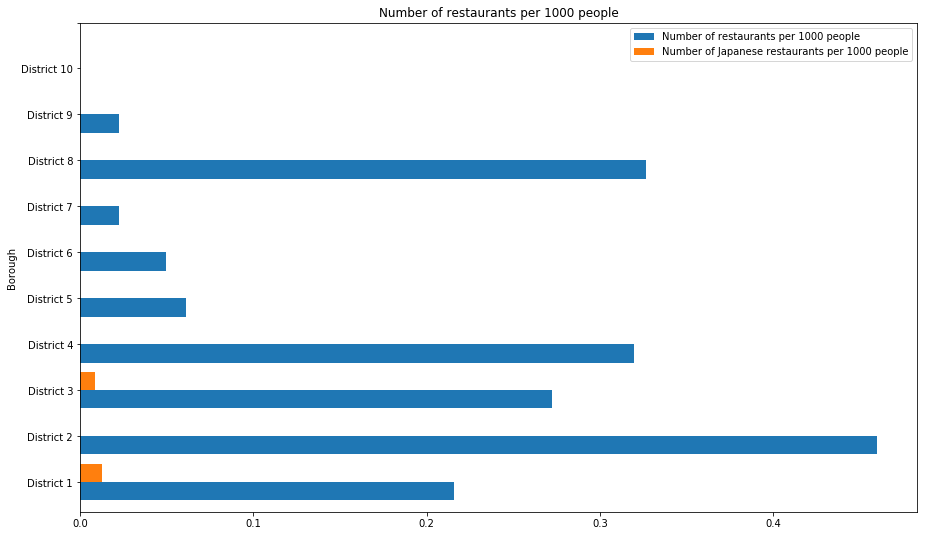

In [20]:
df_restperpop[['Number of restaurants per 1000 people', 'Number of Japanese restaurants per 1000 people']].plot(kind='barh', figsize=(15, 9), width = 0.8)

#plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Number of restaurants per 1000 people') # add title to the plot
plt.yticks (np.arange(11), df['Borough'])
plt.show()

## 4. Results and discussion

During the analysis, three bar charts were created that show a comparison between the number of restaurants (including Japanese restaurants) and  the population density in each of the 10 districts of Düsseldorf. 

Let´s take a deeper look at the number of restaurants first.
According to the barchart most restaurants (31) are in district 3 followed by district 2 (27). The following three districts 8, 1 and 4 are very close together. The remaining districts show very low numbers in restaurants. There are no restaurants in district 10. Interesting is, that there are only 2 Japanese restaurants in total which are in district 1 and 3.

The population density shows how many inhabitants per square-kilometer in each district live. It shows peaks in district 2 and 1 with circa 8000 and 7000 people per qkm. Most other districts show figures between 2800 and 4500. Only district 7 and 5 are below 2000 and 1000.

Key in this analysis is the relation of population density and number of restaurants, which results finally in the new KPI number of restaurants per 1000 people. The last chart reveals that the lowest figures are in district 10, 9, 7, 6 and 5. This means that in these districts there is probably the lowest competition rate. In addition in these districts are no Japanese restaurants, so that another Japanese restaurant can broaden the variety of cuisine available. In all other districts the number of restaurants per 1000 people is much higher and therefore the competition.

The data analysis has some weaknesses that need to be considered here. First, the analysis for an optimal location of a restaurant needs more detailed geolocal information especially data about certain city areas and streets to be more precise. Additionally a lot more information can be added in this analysis in order to enhance the results and make a better recommendation. These coulde be information about the income situation, restaurant expenditures and average age of the inhabitants.
One mistake is very obvious, Foursquare doesn't represent the full picture, since many venues are not on the list. This can be solved by using other data sources such as Google maps.

## 5 Conclusion

To conclude, the data analysis was performed to identify the most optimal borough for the placement of a Japanese restaurant in the city of Düsseldorf. During the analysis, several important statistical features of the boroughs were explored and visualized. Furthermore, the KPI numbers of restaurants per 1000 people helped to find boroughs with low competition level. Finally, district 10, 9, 7, 6 and 5 were chosen in that priority as the most attractive options for the further analysis.